# 01. Importing Libraries

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

# 02. Importing Data

In [3]:
# Define path

path = r'C:\Users\carol\Documents\DA\02 Data Inmersion\06 Advanced Analytics & Dashboard Design\Olist Analysis'

In [4]:
# Import data

units_sold = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'units_sold_final.csv'), index_col = False)

In [5]:
# Check dataset

units_sold.head()

,Unnamed: 0,product_id,units_sold,product_photos_qty,product_name_length,product_description_length
0,2,00066f42aeeb9f3007548bb9d3f33c38,1,6.0,53.0,596.0
1,3,00088930e925c41fd95ebfe695fd2655,1,4.0,56.0,752.0
2,4,0009406fd7479715e4bef61dd91f2462,1,2.0,50.0,266.0
3,5,000b8f95fcb9e0096488278317764d19,2,3.0,25.0,364.0
4,6,000d9be29b5207b54e86aa1b1ac54872,1,4.0,48.0,613.0


In [6]:
# Drop columns

units_sold = units_sold.drop(columns = ['Unnamed: 0','product_id'])

In [7]:
# Import data

payment_preferences = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'payment_preferences_final.csv'), index_col = False)

In [8]:
# Check dataset

payment_preferences.head()

,Unnamed: 0,order_id,order_amount,payment_installments,payment_method_count
0,2,00010242fe8c5a6d1ba2dd792cb16214,72.19,2.0,1
1,3,00018f77f2f0320c557190d7a144bdd3,259.83,3.0,1
2,4,000229ec398224ef6ca0657da4fc703e,216.87,5.0,1
3,5,00024acbcdf0a6daa1e931b038114c75,25.78,2.0,1
4,6,00042b26cf59d7ce69dfabb4e55b4fd9,218.04,3.0,1


In [9]:
# Drop columns

payment_preferences = payment_preferences.drop(columns = ['Unnamed: 0','order_id'])

In [10]:
# Import data

order_reviews = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'order_reviews_final.csv'), index_col = False)

In [11]:
# Check dataset

order_reviews.head()

,Unnamed: 0,order_id,review_score,order_lead_time,order_days_delayed,days_late,lead_time_days
0,2,00010242fe8c5a6d1ba2dd792cb16214,5.0,7.614421,-8.011250,5-10 days early,5-10 days
1,3,00018f77f2f0320c557190d7a144bdd3,4.0,16.216181,-2.330278,0-5 days early,15-20 days
2,4,000229ec398224ef6ca0657da4fc703e,5.0,7.948437,-13.444954,>10 days early,5-10 days
3,5,00024acbcdf0a6daa1e931b038114c75,4.0,6.147269,-5.435660,5-10 days early,5-10 days
4,6,00042b26cf59d7ce69dfabb4e55b4fd9,5.0,25.114352,-15.303808,>10 days early,>20 days


In [12]:
# Drop columns

order_reviews = order_reviews.drop(columns = ['Unnamed: 0','order_id','days_late','lead_time_days'])

In [13]:
# Check for missing values

order_reviews.isnull().sum()

# No missing values to handle

review_score          0
order_lead_time       0
order_days_delayed    0
dtype: int64

In [14]:
# Drop row with missing value

order_reviews = order_reviews.dropna()

# 03. Exploring Relationships

## Correlations

### Units sold

In [15]:
# Create a correlation matrix using pandas

units_sold.corr()

,units_sold,product_photos_qty,product_name_length,product_description_length
units_sold,1.000000,0.003808,0.009288,0.008190
product_photos_qty,0.003808,1.000000,0.134045,0.108519
product_name_length,0.009288,0.134045,1.000000,0.098589
product_description_length,0.008190,0.108519,0.098589,1.000000


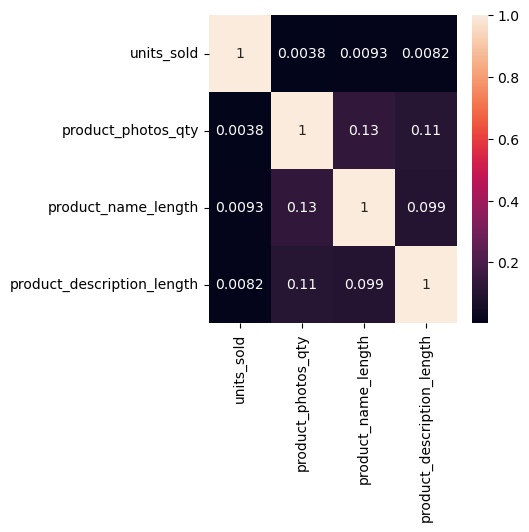

In [16]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(4,4))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(units_sold.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

#### The question I wanted to explore with this heatmap was: What factors have the most impact on the number of units sold per product? Exploring this question would allow Olist to increase its revenue.

#### The independent variables explored were the number of photos published for the product, the length of the product title and the length of the description.

#### The heat map above shows there is no correlation between these variables and the number of units sold:
#### - With number of photos: A 0.0038 coefficient indicates that there is no relationship between these variables.
#### - With product name length: A 0.0093 coefficient indicates that there is no relationship between these variables.
#### - With product description length: A 0.0082 coefficient indicates that there is no relationship between these variables

### Payment preferences

In [17]:
# Create a correlation matrix using pandas

payment_preferences.corr()

,order_amount,payment_installments,payment_method_count
order_amount,1.000000,0.149300,-0.001256
payment_installments,0.149300,1.000000,-0.062362
payment_method_count,-0.001256,-0.062362,1.000000


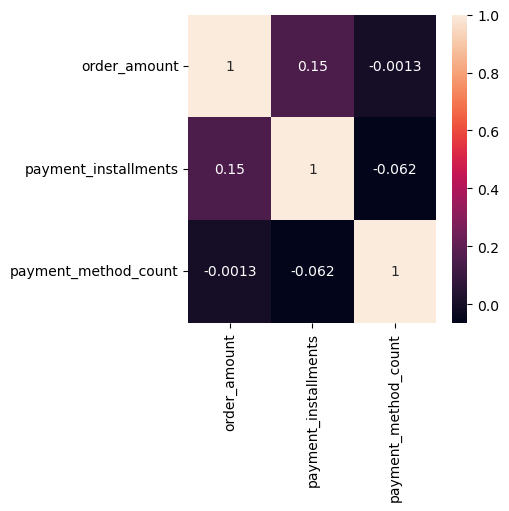

In [18]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(4,4))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(payment_preferences.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

#### The question I wanted to explore with this heatmap was: Does the order amount have an impact on the number of installments or number of payment methods? Exploring this question would allow Olist to explore partnerships with banks.

#### The heat map above shows there is no correlation between these variables:
#### - With number of payment methods: A -0.0013 coefficient indicates that there is no relationship between these variables.
#### - With number of installments: A 0.15 coefficient indicates that there a weak positive relationship between these variables.

### Order reviews

In [19]:
# Create a correlation matrix using pandas

order_reviews.corr()

,review_score,order_lead_time,order_days_delayed
review_score,1.000000,-0.33474,-0.266367
order_lead_time,-0.334740,1.00000,0.599900
order_days_delayed,-0.266367,0.59990,1.000000


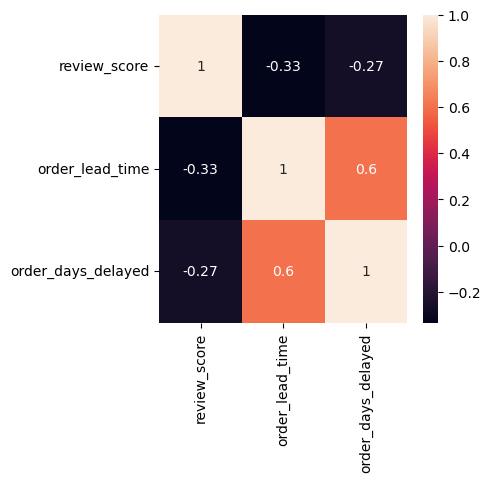

In [20]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(4,4))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(order_reviews.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

#### The question I wanted to explore with this heatmap was: What factors have the most impact on the order rating? Exploring this question would allow Olist to improve their customers ratings.

#### The independent variables explored were the number the order lead time and the number of days the order was delayed (actual delivery date vs estimated delivery date).

#### The heat map above shows there is no correlation between these variables and the number of units sold:
#### - With number of deay delayed: A -0.27 coefficient indicates that there is a weak negative correlation between these variables.
#### - With order lead time: A -0.33 coefficient indicates that there is a moderate negative correlation between these variables.

## Scatterplots:

### I'll create a scaterplot for units sold and review score

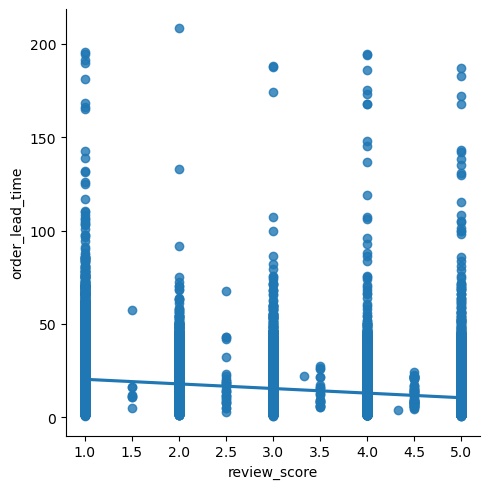

In [21]:
# Create a scatterplot for the "review score" and "order lead time" columns in seaborn

sns.lmplot(x = 'review_score', y = 'order_lead_time', data = order_reviews)

#### The scarterplot shows that there's weak non-linear relationship between the variables

# 04. Create a new table with all variables

#### I'll create a table with all variables aggregating the total of units sold by product_id. 

#### Because the rating is for the order and not the items, I'll exclude orders that have more than 1 items in an order.

In [22]:
# Import data

df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'items_final_all.csv'), index_col = False)

In [23]:
# Check output

df.head()

,Unnamed: 0,order_id,order_item_count,product_id,seller_id,shipping_limit_date,item_price,item_shipping_cost,product_name_length,product_description_length,...,review_id,review_score,review_title,review_text,survey_sent_date,survey_submision_date,order_product_item_count,order_product,order_lead_time,order_days_delayed
0,0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,58,598,...,97ca439bc427b48bc1cd7177abe71365,5,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03,00010242fe8c5a6d1ba2dd792cb16214_4244733e06e7e...,00010242fe8c5a6d1ba2dd792cb16214_4244733e06e7e...,7.614421,-8.011250
1,1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,58,598,...,b11cba360bbe71410c291b764753d37f,5,NaN,"lannister como sempre, entregou certinho e den...",2017-07-14 00:00:00,2017-07-17 12:50:07,130898c0987d1801452a8ed92a670612_4244733e06e7e...,130898c0987d1801452a8ed92a670612_4244733e06e7e...,15.366076,-12.139248
2,2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,58,598,...,af01c4017c5ab46df6cc810e069e654a,4,super recomendo,carrinho muito bonito,2018-06-05 00:00:00,2018-06-06 21:41:12,532ed5e14e24ae1f0d735b91524b98b9_4244733e06e7e...,532ed5e14e24ae1f0d735b91524b98b9_4244733e06e7e...,17.339271,-2.226088
3,3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,58,598,...,8304ff37d8b16b57086fa283fe0c44f8,5,NaN,NaN,2017-08-10 00:00:00,2017-08-13 03:35:17,6f8c31653edb8c83e1a739408b5ff750_4244733e06e7e...,6f8c31653edb8c83e1a739408b5ff750_4244733e06e7e...,8.116563,-15.106563
4,4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,58,598,...,426f43a82185969503fb3c86241a9535,5,NaN,NaN,2017-08-25 00:00:00,2017-08-28 00:51:18,7d19f4ef4d04461989632411b7e588b9_4244733e06e7e...,7d19f4ef4d04461989632411b7e588b9_4244733e06e7e...,13.927558,-7.163646


In [24]:
# Drop columns

df = df.drop(columns = ['Unnamed: 0'])

In [25]:
# Create new dataset

df_max_unique_item_count = df.groupby('order_id').agg({'order_product': ['nunique']})

In [26]:
# check dataset

df_max_unique_item_count

,order_product
,nunique
order_id,
00010242fe8c5a6d1ba2dd792cb16214,1
00018f77f2f0320c557190d7a144bdd3,1
000229ec398224ef6ca0657da4fc703e,1
00024acbcdf0a6daa1e931b038114c75,1
00042b26cf59d7ce69dfabb4e55b4fd9,1
...,...
fffc94f6ce00a00581880bf54a75a037,1
fffcd46ef2263f404302a634eb57f7eb,1


In [27]:
# Export new dataset

df_max_unique_item_count.to_csv(os.path.join(path, '02 Data','Prepared Data', 'order_max_unique_item_count.csv'))

In [28]:
# Import data

df_max_unique_item_count = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'order_max_unique_item_count.csv'), index_col = False)

In [29]:
# Check dataset

df_max_unique_item_count.head()

,Unnamed: 0,order_product
0,NaN,nunique
1,order_id,NaN
2,00010242fe8c5a6d1ba2dd792cb16214,1
3,00018f77f2f0320c557190d7a144bdd3,1
4,000229ec398224ef6ca0657da4fc703e,1


In [30]:
# Rename column

df_max_unique_item_count.rename(columns = {'Unnamed: 0' : 'order_id'}, inplace = True)
df_max_unique_item_count.rename(columns = {'order_product' : 'max_unique_item_count'}, inplace = True)

In [31]:
# Drop rows

df_max_unique_item_count = df_max_unique_item_count.drop([0, 1])

In [32]:
# Check output

df_max_unique_item_count.head()

,order_id,max_unique_item_count
2,00010242fe8c5a6d1ba2dd792cb16214,1
3,00018f77f2f0320c557190d7a144bdd3,1
4,000229ec398224ef6ca0657da4fc703e,1
5,00024acbcdf0a6daa1e931b038114c75,1
6,00042b26cf59d7ce69dfabb4e55b4fd9,1


In [33]:
# Drop and reset index

df_max_unique_item_count.reset_index(drop=True)

,order_id,max_unique_item_count
0,00010242fe8c5a6d1ba2dd792cb16214,1
1,00018f77f2f0320c557190d7a144bdd3,1
2,000229ec398224ef6ca0657da4fc703e,1
3,00024acbcdf0a6daa1e931b038114c75,1
4,00042b26cf59d7ce69dfabb4e55b4fd9,1
...,...,...
96532,fffc94f6ce00a00581880bf54a75a037,1
96533,fffcd46ef2263f404302a634eb57f7eb,1
96534,fffce4705a9662cd70adb13d4a31832d,1
96535,fffe18544ffabc95dfada21779c9644f,1


In [34]:
# Export new dataset

df_max_unique_item_count.to_csv(os.path.join(path, '02 Data','Prepared Data', 'max_unique_item_count_final.csv'))

In [35]:
# Merge items with products

df = df.merge(df_max_unique_item_count, on = 'order_id')

In [36]:
# Check output

df.head()

,order_id,order_item_count,product_id,seller_id,shipping_limit_date,item_price,item_shipping_cost,product_name_length,product_description_length,product_photos_qty,...,review_score,review_title,review_text,survey_sent_date,survey_submision_date,order_product_item_count,order_product,order_lead_time,order_days_delayed,max_unique_item_count
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,58,598,4,...,5,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03,00010242fe8c5a6d1ba2dd792cb16214_4244733e06e7e...,00010242fe8c5a6d1ba2dd792cb16214_4244733e06e7e...,7.614421,-8.011250,1
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,58,598,4,...,5,NaN,"lannister como sempre, entregou certinho e den...",2017-07-14 00:00:00,2017-07-17 12:50:07,130898c0987d1801452a8ed92a670612_4244733e06e7e...,130898c0987d1801452a8ed92a670612_4244733e06e7e...,15.366076,-12.139248,1
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,58,598,4,...,4,super recomendo,carrinho muito bonito,2018-06-05 00:00:00,2018-06-06 21:41:12,532ed5e14e24ae1f0d735b91524b98b9_4244733e06e7e...,532ed5e14e24ae1f0d735b91524b98b9_4244733e06e7e...,17.339271,-2.226088,1
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,58,598,4,...,5,NaN,NaN,2017-08-10 00:00:00,2017-08-13 03:35:17,6f8c31653edb8c83e1a739408b5ff750_4244733e06e7e...,6f8c31653edb8c83e1a739408b5ff750_4244733e06e7e...,8.116563,-15.106563,1
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,58,598,4,...,5,NaN,NaN,2017-08-25 00:00:00,2017-08-28 00:51:18,7d19f4ef4d04461989632411b7e588b9_4244733e06e7e...,7d19f4ef4d04461989632411b7e588b9_4244733e06e7e...,13.927558,-7.163646,1


In [37]:
## Create “max_order” column

df['max_item_count'] = df.groupby(['order_id'])['order_item_count'].transform(np.max)

In [38]:
# Check output

df.head()

,order_id,order_item_count,product_id,seller_id,shipping_limit_date,item_price,item_shipping_cost,product_name_length,product_description_length,product_photos_qty,...,review_title,review_text,survey_sent_date,survey_submision_date,order_product_item_count,order_product,order_lead_time,order_days_delayed,max_unique_item_count,max_item_count
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,58,598,4,...,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03,00010242fe8c5a6d1ba2dd792cb16214_4244733e06e7e...,00010242fe8c5a6d1ba2dd792cb16214_4244733e06e7e...,7.614421,-8.011250,1,1
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,58,598,4,...,NaN,"lannister como sempre, entregou certinho e den...",2017-07-14 00:00:00,2017-07-17 12:50:07,130898c0987d1801452a8ed92a670612_4244733e06e7e...,130898c0987d1801452a8ed92a670612_4244733e06e7e...,15.366076,-12.139248,1,1
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,58,598,4,...,super recomendo,carrinho muito bonito,2018-06-05 00:00:00,2018-06-06 21:41:12,532ed5e14e24ae1f0d735b91524b98b9_4244733e06e7e...,532ed5e14e24ae1f0d735b91524b98b9_4244733e06e7e...,17.339271,-2.226088,1,1
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,58,598,4,...,NaN,NaN,2017-08-10 00:00:00,2017-08-13 03:35:17,6f8c31653edb8c83e1a739408b5ff750_4244733e06e7e...,6f8c31653edb8c83e1a739408b5ff750_4244733e06e7e...,8.116563,-15.106563,1,1
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,58,598,4,...,NaN,NaN,2017-08-25 00:00:00,2017-08-28 00:51:18,7d19f4ef4d04461989632411b7e588b9_4244733e06e7e...,7d19f4ef4d04461989632411b7e588b9_4244733e06e7e...,13.927558,-7.163646,1,1


In [39]:
df['max_unique_item_count']=df['max_unique_item_count'].astype('int64')

In [40]:
# create a subset

df =  df[df['max_unique_item_count']==1]

In [41]:
# Check output

df.shape

(107591, 45)

In [42]:
# Create new dataset

units_sold_all_var = df.groupby('product_id').agg({'order_product_item_count': ['nunique'],'product_photos_qty': ['mean'],'product_name_length': ['mean'],'product_description_length': ['mean'],'review_score': ['mean'],'item_price': ['mean']})

In [43]:
units_sold_all_var.head()

,order_product_item_count,product_photos_qty,product_name_length,product_description_length,review_score,item_price
,nunique,mean,mean,mean,mean,mean
product_id,,,,,,
00066f42aeeb9f3007548bb9d3f33c38,1,6.0,53.0,596.0,5.0,101.65
00088930e925c41fd95ebfe695fd2655,1,4.0,56.0,752.0,4.0,129.90
0009406fd7479715e4bef61dd91f2462,1,2.0,50.0,266.0,1.0,229.00
000b8f95fcb9e0096488278317764d19,2,3.0,25.0,364.0,5.0,58.90
000d9be29b5207b54e86aa1b1ac54872,1,4.0,48.0,613.0,5.0,199.00


In [44]:
# Rename column

units_sold_all_var.rename(columns = {'order_product_item_count' : 'units_sold'}, inplace = True)

In [45]:
# Export new dataset

units_sold_all_var.to_csv(os.path.join(path, '02 Data','Prepared Data', 'units_sold_all_var.csv'))

In [46]:
# Import data

units_sold_all_var = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'units_sold_all_var.csv'), index_col = False)

In [47]:
# check dataset

units_sold_all_var.head()

,Unnamed: 0,units_sold,product_photos_qty,product_name_length,product_description_length,review_score,item_price
0,NaN,nunique,mean,mean,mean,mean,mean
1,product_id,NaN,NaN,NaN,NaN,NaN,NaN
2,00066f42aeeb9f3007548bb9d3f33c38,1,6.0,53.0,596.0,5.0,101.65
3,00088930e925c41fd95ebfe695fd2655,1,4.0,56.0,752.0,4.0,129.9
4,0009406fd7479715e4bef61dd91f2462,1,2.0,50.0,266.0,1.0,229.0


In [48]:
# Rename column

units_sold_all_var.rename(columns = {'Unnamed: 0' : 'product_id'}, inplace = True)

In [49]:
# Drop rows

units_sold_all_var_final = units_sold_all_var.drop([0, 1])

In [50]:
# Check output

units_sold_all_var_final.head()

,product_id,units_sold,product_photos_qty,product_name_length,product_description_length,review_score,item_price
2,00066f42aeeb9f3007548bb9d3f33c38,1,6.0,53.0,596.0,5.0,101.65
3,00088930e925c41fd95ebfe695fd2655,1,4.0,56.0,752.0,4.0,129.9
4,0009406fd7479715e4bef61dd91f2462,1,2.0,50.0,266.0,1.0,229.0
5,000b8f95fcb9e0096488278317764d19,2,3.0,25.0,364.0,5.0,58.9
6,000d9be29b5207b54e86aa1b1ac54872,1,4.0,48.0,613.0,5.0,199.0


In [51]:
# Drop and reset index

units_sold_all_var_final.reset_index(drop=True)

,product_id,units_sold,product_photos_qty,product_name_length,product_description_length,review_score,item_price
0,00066f42aeeb9f3007548bb9d3f33c38,1,6.0,53.0,596.0,5.0,101.65
1,00088930e925c41fd95ebfe695fd2655,1,4.0,56.0,752.0,4.0,129.9
2,0009406fd7479715e4bef61dd91f2462,1,2.0,50.0,266.0,1.0,229.0
3,000b8f95fcb9e0096488278317764d19,2,3.0,25.0,364.0,5.0,58.9
4,000d9be29b5207b54e86aa1b1ac54872,1,4.0,48.0,613.0,5.0,199.0
...,...,...,...,...,...,...,...
30259,fff6177642830a9a94a0f2cba5e476d1,2,1.0,54.0,842.0,4.5,114.99
30260,fff81cc3158d2725c0655ab9ba0f712c,1,1.0,54.0,643.0,4.0,90.0
30261,fff9553ac224cec9d15d49f5a263411f,1,3.0,22.0,328.0,5.0,32.0
30262,fffdb2d0ec8d6a61f0a0a0db3f25b441,5,5.0,47.0,501.0,5.0,33.989999999999995


In [52]:
# Check output

units_sold_all_var_final.shape

(30264, 7)

In [53]:
# Export new dataset

units_sold_all_var_final.to_csv(os.path.join(path, '02 Data','Prepared Data', 'units_sold_all_var_final.csv'))

In [54]:
# Export dataset with new columns

df.to_csv(os.path.join(path, '02 Data','Prepared Data', 'items_max_items_1.csv'))

## Import dataset

In [55]:
# Import data

df_corr = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'units_sold_all_var_final.csv'), index_col = False)

In [56]:
# Check dataset

df_corr.head()

,Unnamed: 0,product_id,units_sold,product_photos_qty,product_name_length,product_description_length,review_score,item_price
0,2,00066f42aeeb9f3007548bb9d3f33c38,1,6.0,53.0,596.0,5.0,101.65
1,3,00088930e925c41fd95ebfe695fd2655,1,4.0,56.0,752.0,4.0,129.90
2,4,0009406fd7479715e4bef61dd91f2462,1,2.0,50.0,266.0,1.0,229.00
3,5,000b8f95fcb9e0096488278317764d19,2,3.0,25.0,364.0,5.0,58.90
4,6,000d9be29b5207b54e86aa1b1ac54872,1,4.0,48.0,613.0,5.0,199.00


In [57]:
# Drop columns

df_corr = df_corr.drop(columns = ['Unnamed: 0','product_id','product_name_length'])

In [58]:
# Check columns

df_corr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30264 entries, 0 to 30263
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   units_sold                  30264 non-null  int64  
 1   product_photos_qty          30264 non-null  float64
 2   product_description_length  30264 non-null  float64
 3   review_score                30264 non-null  float64
 4   item_price                  30264 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 1.2 MB


In [59]:
# Change types for data set

df_corr['product_photos_qty']=df_corr['product_photos_qty'].astype('int64')
# df_corr['product_name_length']=df_corr['product_name_length'].astype('int64')
df_corr['product_description_length']=df_corr['product_description_length'].astype('int64')

# 05. Explore relationships Part 2

## Create a correlation heatmap using seaborn:

In [60]:
# Create a correlation matrix using pandas

df_corr.corr()

,units_sold,product_photos_qty,product_description_length,review_score,item_price
units_sold,1.000000,0.004443,0.010379,-0.007084,-0.033775
product_photos_qty,0.004443,1.000000,0.106129,0.012547,0.058932
product_description_length,0.010379,0.106129,1.000000,0.012725,0.193243
review_score,-0.007084,0.012547,0.012725,1.000000,-0.020261
item_price,-0.033775,0.058932,0.193243,-0.020261,1.000000


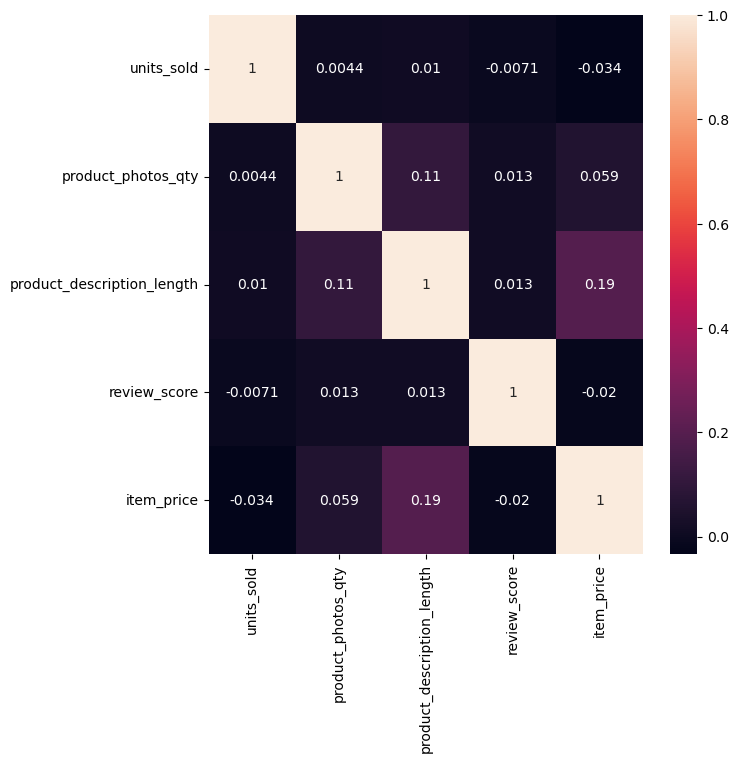

In [61]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(7,7))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(df_corr.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

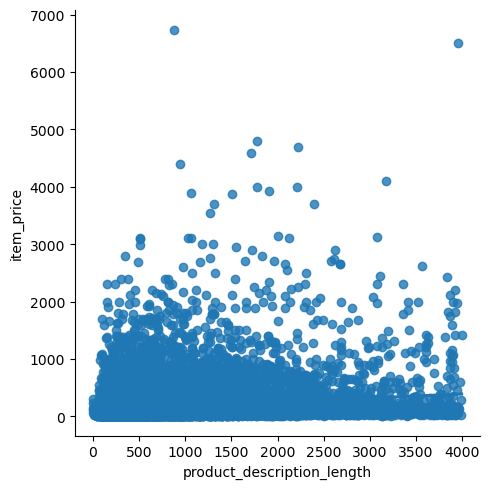

In [62]:
# Create a scatterplot for the "units sold" and "price per item" columns in seaborn

sns.lmplot(x = 'product_description_length', y = 'item_price', data = df_corr)

## Pair Plots:

In [63]:
# Keep only price, units sold, number of pictures and review score

df_corr_2 = df_corr[['units_sold', 'product_photos_qty', 'product_description_length', 'review_score', 'item_price']]

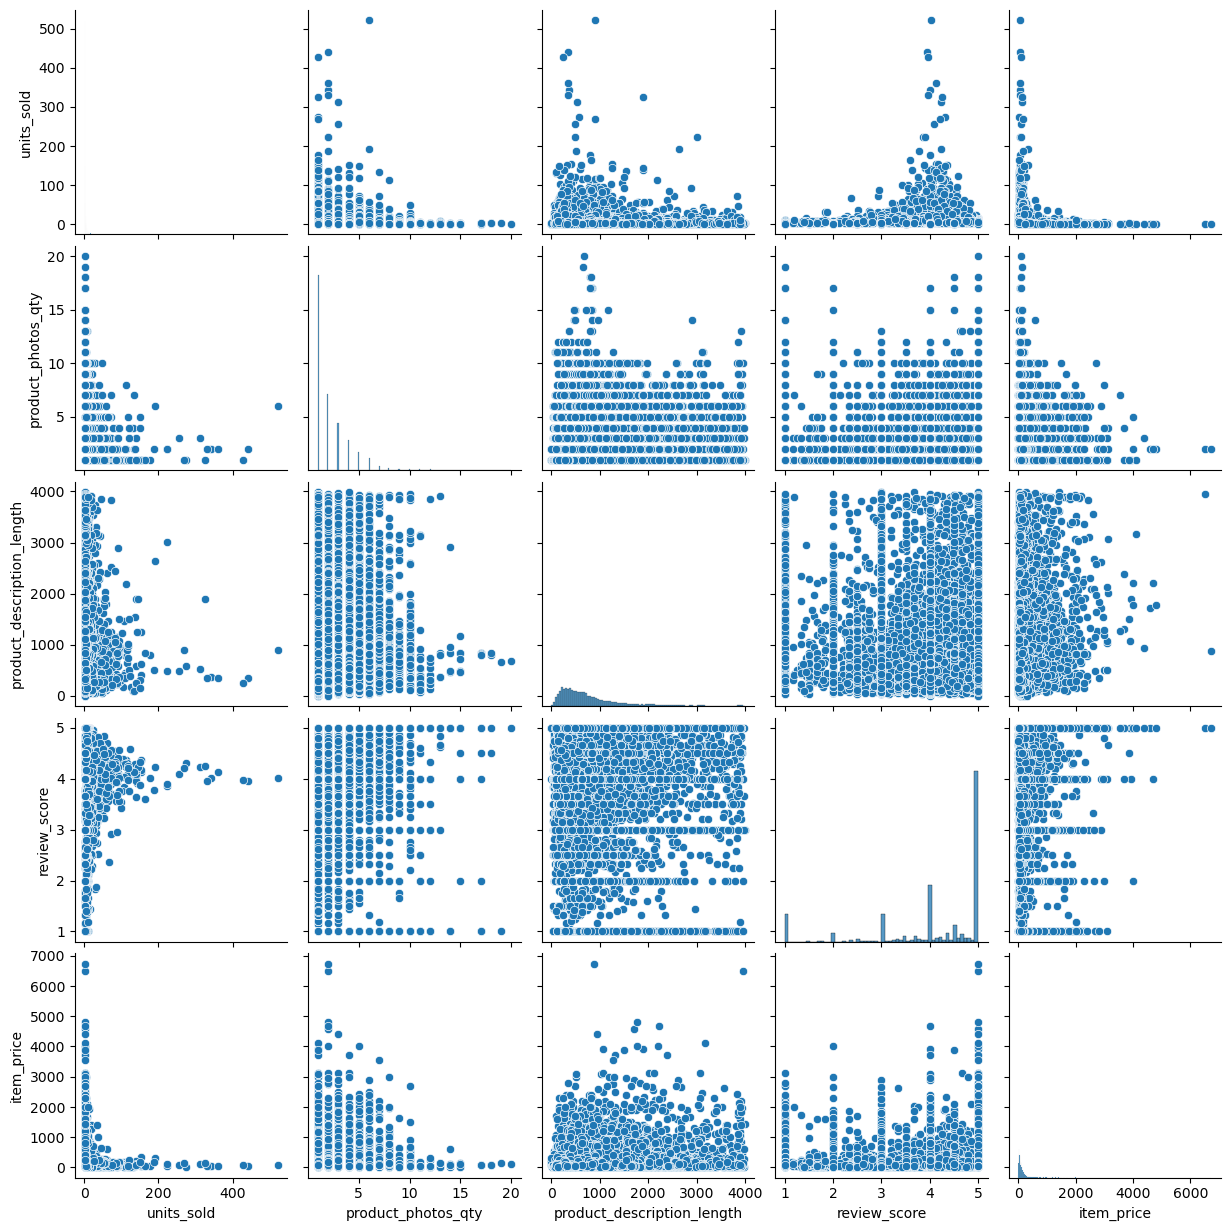

In [64]:
# Create a pair plot 

g = sns.pairplot(df_corr_2)

## Categorical plots:

<Axes: xlabel='units_sold', ylabel='Count'>

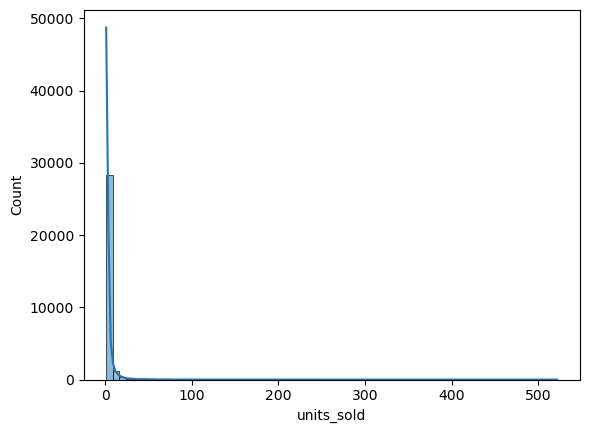

In [65]:
# Create histogram for price

sns.histplot(df_corr['units_sold'], bins = 70, kde = True)

In [66]:
# Check table stats

df_corr['units_sold'].describe()

count    30264.000000
mean         3.389737
std         10.343651
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max        522.000000
Name: units_sold, dtype: float64

In [67]:
df_corr.loc[df_corr['units_sold'] < 2, 'type_of_order'] = 'Low Sales Item'

In [68]:
df_corr.loc[(df_corr['units_sold'] >= 2) & (df_corr['units_sold'] < 3), 'type_of_order'] = 'Medium Sales Item'

In [69]:
df_corr.loc[df_corr['units_sold'] >= 3, 'type_of_order'] = 'High Sales Item'

In [70]:
df_corr.head()

,units_sold,product_photos_qty,product_description_length,review_score,item_price,type_of_order
0,1,6,596,5.0,101.65,Low Sales Item
1,1,4,752,4.0,129.90,Low Sales Item
2,1,2,266,1.0,229.00,Low Sales Item
3,2,3,364,5.0,58.90,Medium Sales Item
4,1,4,613,5.0,199.00,Low Sales Item


In [71]:
df_agg = df_corr.groupby('type_of_order').agg({'units_sold': ['count']})

In [72]:
df_agg

,units_sold
,count
type_of_order,
High Sales Item,8230
Low Sales Item,16686
Medium Sales Item,5348


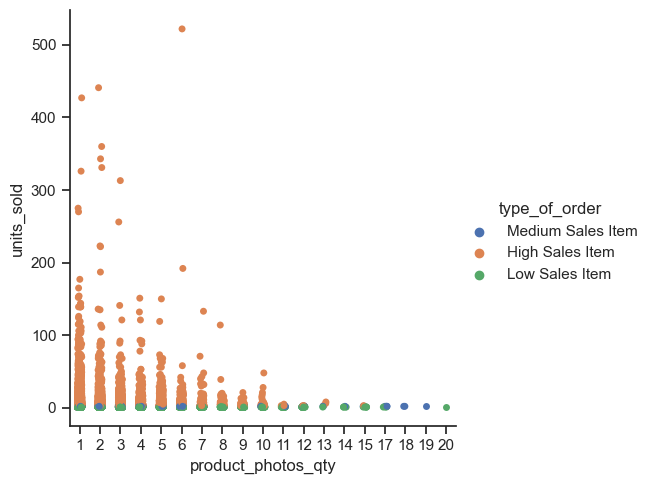

In [73]:
# Create a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
g = sns.catplot(x="product_photos_qty", y="units_sold", hue="type_of_order", data=df_corr)

# 06. Conclusions

#### The results show no significant relationship between variables.

### Answering questions from task 6.1

#### •	Is there a relationship between delivery time and customer ratings?
####   There's a moderate negative relationship (-0.33 coefficient) between delivery time and customer ratings 

#### •	Is there a relationship between price and the number of payment installments?
####    There's weak (0.15 coefficient) relationship between the order amount and the number of installments 

### Answering questions from task 6.1 (data from the dataset that integrates all variables)

#### •	Is there a relationship between the number of pictures published per product and sales?
####    There's no relationship (0.0044 coefficient) between the number of pictures published and units sold

#### •	Is there a relationship between the length of the product description and sales?
####   There's no relationship (0.01 coefficient) between the length of the product description and units sold 

# 07. Next steps

#### Because most of the products have only 1 unit sold, I'll create a subset to exclude them and explore the relationships of this subset to see if it reveals any significant patterns.